In [2]:
#라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import json
import seaborn as sns
import datetime

In [3]:
#구글 코랩에서 구글 드라이브 마운트
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# 드라이브에서 csv 파일을 읽어와서 arxiv_data에 저장
arxiv_data = pd.read_csv("/content/drive/MyDrive/arxiv_ai.csv")

In [ ]:
# 드라이브에서 csv 파일을 읽어와서 category_data에 저장
category_data = pd.read_csv("/content/drive/MyDrive/paperswithcode_indexs_fin.csv")

In [ ]:
# 결측값이 있는 행 제거
category_data.dropna(inplace = True)
#데이터 프레임 수 재설정
category_data.reset_index(drop =True, inplace = True)
#출력
category_data

,method_name,categories_name,model_name,indexs
0,Computer Vision,Image Models,ResNet,"32768, 106502, 81929, 106505, 155660, 172046, ..."
1,Computer Vision,Image Models,Vision Transformer,"112653, 24594, 133144, 112668, 135197, 135200,..."
2,Computer Vision,Image Models,VGG,"90113, 88070, 106505, 38922, 104461, 120846, 8..."
3,Computer Vision,Image Models,DenseNet,"94210, 91651, 27140, 86021, 39430, 96259, 1070..."
4,Computer Vision,Image Models,VGG-16,"90113, 111619, 110086, 86537, 38922, 89611, 99..."
...,...,...,...,...
1440,Graphs,Graph Representation Learning,GMI,"150168, 180312"
1441,Graphs,Graph Representation Learning,L-GCN,60984
1442,Graphs,Graph Representation Learning,GFSA,159177
1443,Graphs,Graph Representation Learning,DyGED,170365


In [ ]:
for idx, data in enumerate(category_data['indexs']):
    if isinstance(data, str):
        category_data['indexs'][idx] = [int(i) for i in data.split(",")]


In [ ]:
category_data[category_data['method_name'] == 'Graphs']

,method_name,categories_name,model_name,indexs
1366,Graphs,Graph Models,GCN,"[98304, 14338, 180226, 24586, 157707, 12302, 1..."
1367,Graphs,Graph Models,DCNN,"[28673, 115706, 107011, 79876, 95748, 88073, 1..."
1368,Graphs,Graph Models,Graph Transformer,"[28674, 34818, 36866, 41987, 179215, 183320, 4..."
1369,Graphs,Graph Models,GAT,"[47617, 34825, 25099, 29708, 155660, 157707, 1..."
1370,Graphs,Graph Models,GraphSAGE,"[180867, 19204, 172037, 174981, 160396, 171405..."
...,...,...,...,...
1440,Graphs,Graph Representation Learning,GMI,"[150168, 180312]"
1441,Graphs,Graph Representation Learning,L-GCN,[60984]
1442,Graphs,Graph Representation Learning,GFSA,[159177]
1443,Graphs,Graph Representation Learning,DyGED,[170365]


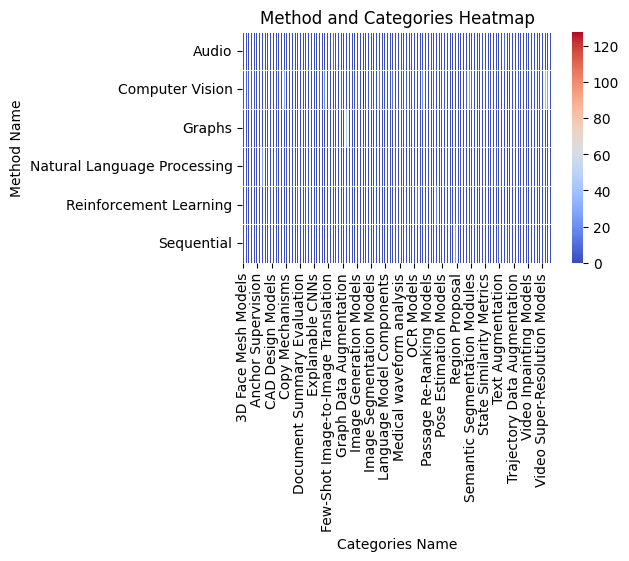

In [ ]:
# 데이터 전처리
# 'method_name'과 'categories_name'에 대한 조합의 빈도를 계산
heatmap_data = category_data.groupby(['method_name', 'categories_name']).size().reset_index(name='count')

# 피벗 테이블 생성
heatmap_pivot = heatmap_data.pivot(index='method_name', columns='categories_name', values='count').fillna(0)

# 히트맵 생성
plt.figure(figsize=(5, 3))


sns.heatmap(heatmap_pivot, cmap='coolwarm', annot=False, fmt='g', linewidths=.5)

plt.title('Method and Categories Heatmap')
plt.xlabel('Categories Name')
plt.ylabel('Method Name')

plt.show()